# Logistic Regression

It's time for some classification!!

We will make a Logistic Regression classifier for the MNIST dataset.

## Import libraries

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Prepare Dataset

We will import the MNIST Dataset from Kaggle.

### Import Dataset

{"username":"giorgospapadakis227",

"key":"0d98fada57d63e3b60481c013c67e993"}

In [ ]:
!pip install opendatasets


In [ ]:
# import the MNIST dataset

import opendatasets as od

od.download("https://www.kaggle.com/competitions/digit-recognizer/data", force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: giorgospapadakis227
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 38.4MB/s]



Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


### Prepare Dataset

First we load the data with pandas.

In [ ]:
# load data with pands
train = pd.read_csv('/content/digit-recognizer/train.csv', dtype = np.float32)

# split data into features(pixels) and labels
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255# /255 to normalize the pixels

# split the train dataset into 80% train and test 20%
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

We have to create Variables to continue with the gradients of the model.

So we will create tensors, then Variables.

In [ ]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

Next, we have to define the batch size, epochs and iterations.

In [ ]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

Now we have to create our real train/test datasets.

We can do it with the help of ``` DataLoaders```.



In [ ]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

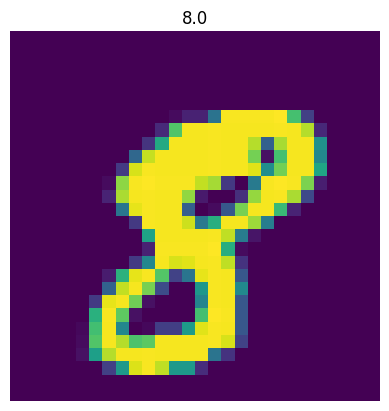

In [ ]:
# visualise some images in the dataset

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.show()


## Define LogisticRegression class and model

In [ ]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts

    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train model

In [ ]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8281488418579102  Accuracy: 67.94047546386719%
Iteration: 1000  Loss: 1.6025463342666626  Accuracy: 75.85713958740234%
Iteration: 1500  Loss: 1.2813847064971924  Accuracy: 78.4047622680664%
Iteration: 2000  Loss: 1.1959737539291382  Accuracy: 80.11904907226562%
Iteration: 2500  Loss: 1.048294186592102  Accuracy: 81.19047546386719%
Iteration: 3000  Loss: 0.942579448223114  Accuracy: 82.08333587646484%
Iteration: 3500  Loss: 0.8961941599845886  Accuracy: 82.6547622680664%
Iteration: 4000  Loss: 0.755138099193573  Accuracy: 83.0952377319336%
Iteration: 4500  Loss: 0.9683355093002319  Accuracy: 83.48809814453125%
Iteration: 5000  Loss: 0.8056088089942932  Accuracy: 83.83333587646484%
Iteration: 5500  Loss: 0.7545871138572693  Accuracy: 84.20237731933594%
Iteration: 6000  Loss: 0.8670231699943542  Accuracy: 84.41666412353516%
Iteration: 6500  Loss: 0.664065420627594  Accuracy: 84.71428680419922%
Iteration: 7000  Loss: 0.7113122344017029  Accuracy: 84.94047546386719%


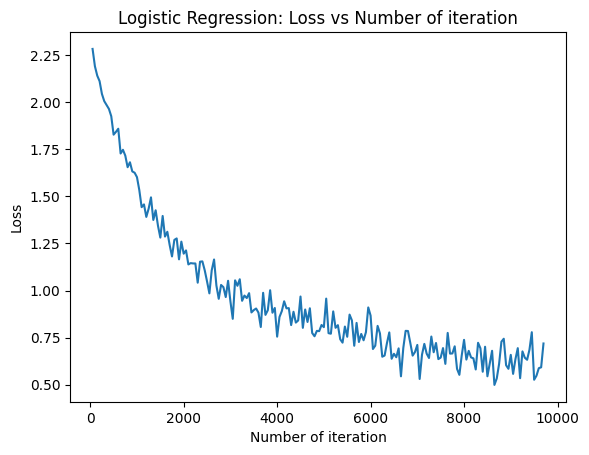

In [ ]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

## Predictions

In [ ]:
for images, labels in test_loader:
  test = Variable(images.view(-1, 28*28))

  # Forward propagation
  outputs = model(test)

  # Get predictions from the maximum value
  predicted = torch.max(outputs.data, 1)[1]

In [ ]:
for i in range(100):
  print('Predicted = {}, Real = {}'.format(predicted[i], labels[i]))

# Total correct predictions
correct += (predicted == labels).sum()

accuracy = 100 * correct / float(total)
print('Accuracy = ', accuracy.item())

Predicted = 4, Real = 7
Predicted = 9, Real = 9
Predicted = 8, Real = 5
Predicted = 1, Real = 1
Predicted = 0, Real = 0
Predicted = 1, Real = 1
Predicted = 0, Real = 9
Predicted = 2, Real = 2
Predicted = 4, Real = 4
Predicted = 4, Real = 4
Predicted = 2, Real = 2
Predicted = 0, Real = 0
Predicted = 1, Real = 1
Predicted = 0, Real = 0
Predicted = 3, Real = 3
Predicted = 7, Real = 7
Predicted = 2, Real = 2
Predicted = 8, Real = 8
Predicted = 2, Real = 2
Predicted = 7, Real = 7
Predicted = 2, Real = 2
Predicted = 4, Real = 8
Predicted = 8, Real = 0
Predicted = 7, Real = 7
Predicted = 6, Real = 6
Predicted = 1, Real = 8
Predicted = 3, Real = 5
Predicted = 5, Real = 5
Predicted = 5, Real = 5
Predicted = 9, Real = 2
Predicted = 5, Real = 5
Predicted = 0, Real = 0
Predicted = 5, Real = 5
Predicted = 1, Real = 1
Predicted = 1, Real = 1
Predicted = 8, Real = 8
Predicted = 0, Real = 0
Predicted = 8, Real = 8
Predicted = 3, Real = 3
Predicted = 3, Real = 3
Predicted = 3, Real = 5
Predicted = 8, R